In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [78]:
time = pd.read_csv("./data/csv_time.txt", names=["method_name","classifier","number_of_nodes", "train_edges","test_edges", "classifier_training_time", "method_time"])
time = time.drop(['train_edges', 'test_edges', 'classifier_training_time'], axis=1)
blankIndex=[''] * len(time)
time.index=blankIndex
time


,method_name,classifier,number_of_nodes,method_time
,nodevec (32),SVM,5783,16.9564
,node2vec (16),SVM,5783,17.7308
,node2vec+UMAP (16),SVM,5783,31.5087
,node2vec+PCA (16),SVM,5783,0.0173
,nodevec (32),LR,5783,16.5669
,node2vec (16),LR,5783,17.5029
,node2vec+UMAP (16),LR,5783,30.6835
,node2vec+PCA (16),LR,5783,0.0156
,nodevec (32),SVM,2299,5.9667
,node2vec (16),SVM,2299,6.0135


('node2vec (16)', 'LR') 5     17.5029
13     6.1549
21     2.8761
Name: method_time, dtype: float64
('node2vec (16)', 'SVM') 1     17.7308
9      6.0135
17     2.9588
Name: method_time, dtype: float64
('node2vec+PCA (16)', 'LR') 7     0.0156
15    0.0103
23    0.0088
Name: method_time, dtype: float64
('node2vec+PCA (16)', 'SVM') 3     0.0173
11    0.0111
19    0.0085
Name: method_time, dtype: float64
('node2vec+UMAP (16)', 'LR') 6     30.6835
14    20.9363
22    10.1956
Name: method_time, dtype: float64
('node2vec+UMAP (16)', 'SVM') 2     31.5087
10    20.7935
18    10.1158
Name: method_time, dtype: float64
('nodevec (32)', 'LR') 4     16.5669
12     5.8150
20     2.6772
Name: method_time, dtype: float64
('nodevec (32)', 'SVM') 0     16.9564
8      5.9667
16     2.7698
Name: method_time, dtype: float64


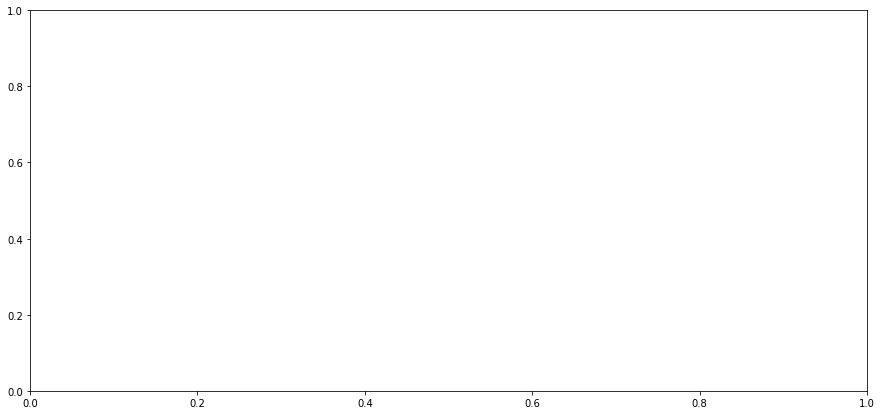

In [3]:
fig, ax = plt.subplots(figsize=(15,7))

group_by = time.groupby(['method_name', 'classifier'])['method_time']

for name,group in group_by:
    print (name, group)

In [7]:
df = pd.read_csv("./data/csv_results.txt", names=["method_name","classifier","number_of_nodes", "train_edges","test_edges", "testROC", "testPC"])
df = df.drop(['train_edges', 'test_edges'], axis=1)
blankIndex=[''] * len(df)
df.index=blankIndex
df

,method_name,classifier,number_of_nodes,testROC,testPC
,Adamic-Adar,SVM,5783,0.7887,0.7892
,Jaccard Coefficient,SVM,5783,0.7860,0.7811
,Preferential Attachment,SVM,5783,0.7366,0.7536
,node2vec (32),SVM,5783,0.9226,0.9302
,node2vec (16),SVM,5783,0.9127,0.9168
,node2vec+UMAP (16),SVM,5783,0.9003,0.8887
,node2vec+PCA (16),SVM,5783,0.9311,0.9329
,Adamic-Adar,LR,5783,0.7904,0.7911
,Jaccard Coefficient,LR,5783,0.7878,0.7838
,Preferential Attachment,LR,5783,0.7401,0.7588


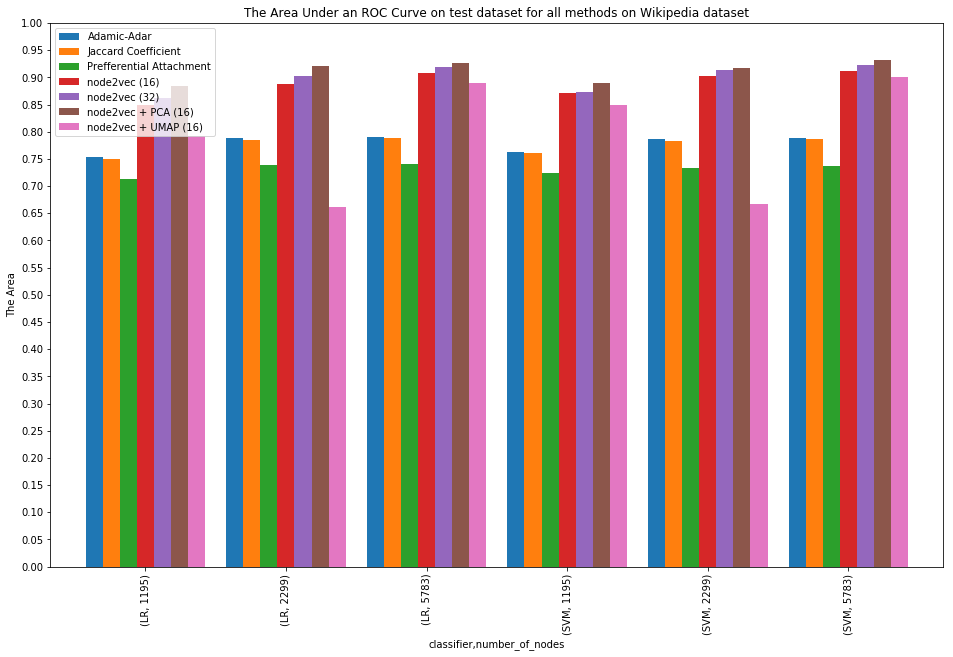

In [62]:
df_roc = df.groupby(['method_name','classifier','number_of_nodes']).apply(lambda _df: _df.testROC).unstack(0)

f = plt.figure(figsize=(16,10))
plt.title('The Area Under an ROC Curve on test dataset for all methods on Wikipedia dataset', color='black')
plt.xlabel('Experiment: classifier, number of nodes')
plt.ylabel('The Area')

df_roc.plot(kind='bar', ax=f.gca(), width=0.85)
plt.legend(["Adamic-Adar", "Jaccard Coefficient", "Prefferential Attachment", "node2vec (16)",
            "node2vec (32)", "node2vec + PCA (16)", "node2vec + UMAP (16)"], loc='upper left')
plt.yticks(np.arange(0, 1.05, step=0.05))
plt.show()


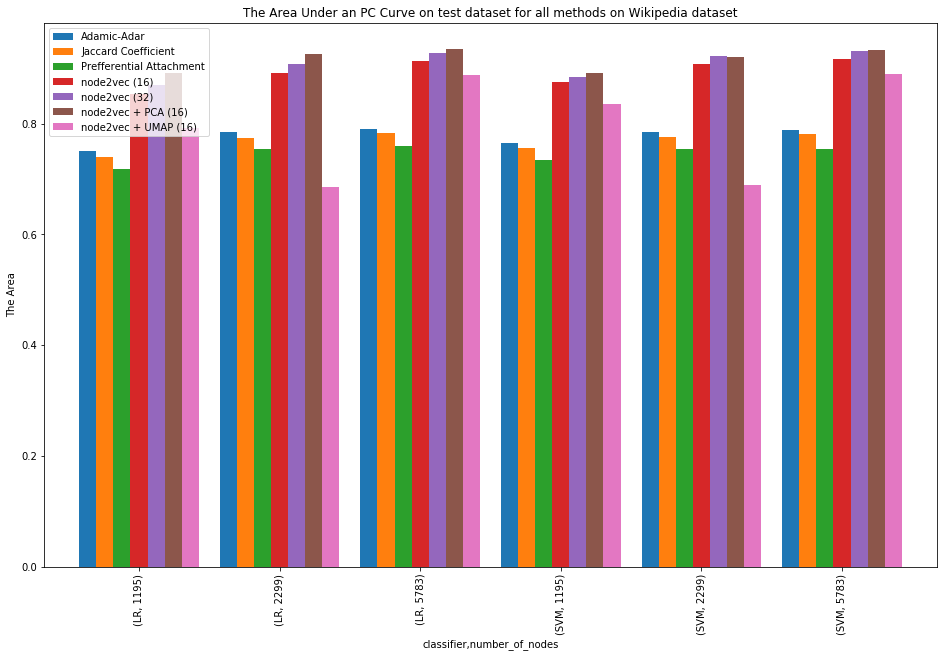

In [63]:
df_pc = df.groupby(['method_name','classifier','number_of_nodes']).apply(lambda _df: _df.testPC).unstack(0)

f = plt.figure(figsize=(16,10))
plt.title('The Area Under an PC Curve on test dataset for all methods on Wikipedia dataset', color='black')
plt.ylabel('The Area')
plt.xlabel('Experiment: classifier, number of nodes')

df_pc.plot(kind='bar', ax=f.gca(), width=0.85)
plt.legend(["Adamic-Adar", "Jaccard Coefficient", "Prefferential Attachment", "node2vec (16)",
            "node2vec (32)", "node2vec + PCA (16)", "node2vec + UMAP (16)"], loc='upper left')
plt.show()

In [89]:
df_time = time.groupby(['method_name','classifier','number_of_nodes']).apply(lambda _df: _df.method_time).unstack(0)
df_time

method_time                                                                    \
method_name                node2vec (16) node2vec+PCA (16) node2vec+UMAP (16)   
classifier number_of_nodes                                                      
LR         1195                   2.8761            0.0088            10.1956   
           2299                   6.1549            0.0103            20.9363   
           5783                  17.5029            0.0156            30.6835   
SVM        1195                   2.9588            0.0085            10.1158   
           2299                   6.0135            0.0111            20.7935   
           5783                  17.7308            0.0173            31.5087   

method_time                              
method_name                nodevec (32)  
classifier number_of_nodes               
LR         1195                  2.6772  
           2299                  5.8150  
           5783                 16.5669  
SVM        1195                  2.7698  
           2299                  5.9667  
           5783                 16.9564

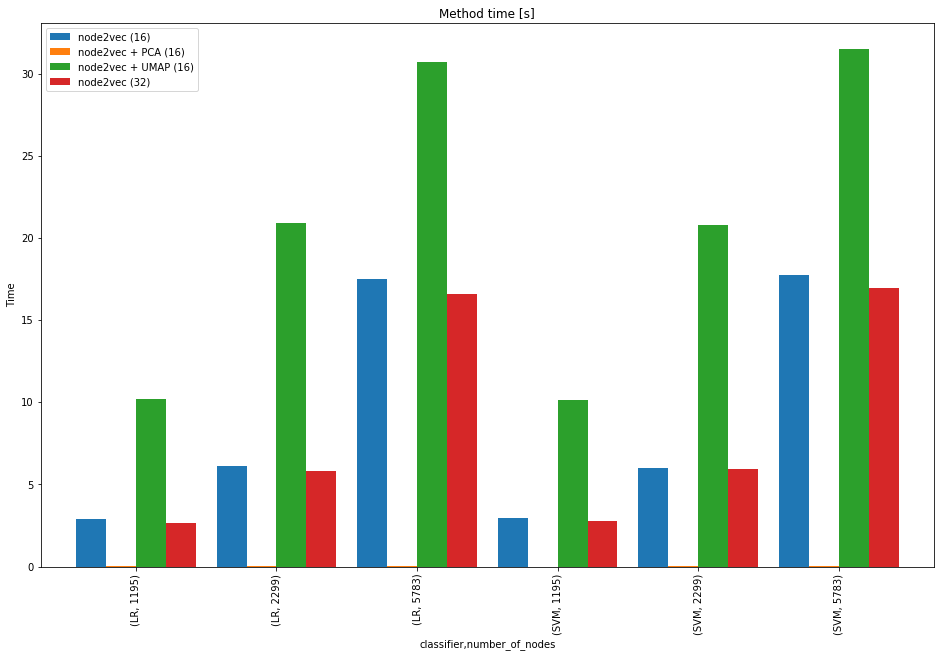

In [90]:
f = plt.figure(figsize=(16,10))
plt.title('Method time [s]', color='black')
plt.ylabel('Time')
plt.xlabel('Experiment: classifier, number of nodes')

df_time.plot(kind='bar', ax=f.gca(), width=0.85)
plt.legend(["node2vec (16)", "node2vec + PCA (16)", "node2vec + UMAP (16)", "node2vec (32)"], loc='upper left')
plt.show()